# Simple Gaussian Naive Bayes Classification

## Fig 9.2

In [23]:
"""
Simple Gaussian Naive Bayes Classification
------------------------------------------
Figure 9.2

A decision boundary computed for a simple data set using Gaussian naive Bayes
classification. The line shows the decision boundary, which corresponds to the
curve where a new point has equal posterior probability of being part of each
class. In such a simple case, it is possible to find a classification with
perfect completeness and contamination. This is rarely the case in the real
world.
"""


'\nSimple Gaussian Naive Bayes Classification\n------------------------------------------\nFigure 9.2\n\nA decision boundary computed for a simple data set using Gaussian naive Bayes\nclassification. The line shows the decision boundary, which corresponds to the\ncurve where a new point has equal posterior probability of being part of each\nclass. In such a simple case, it is possible to find a classification with\nperfect completeness and contamination. This is rarely the case in the real\nworld.\n'

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.naive_bayes import GaussianNB

In [25]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [26]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [27]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [28]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

# Simulate some data

In [29]:
#------------------------------------------------------------
# Simulate some data
np.random.seed(0)
mu1 = [1, 1]
cov1 = 0.3 * np.eye(2)

mu2 = [5, 3]
cov2 = np.eye(2) * np.array([0.4, 0.1])

X = np.concatenate([np.random.multivariate_normal(mu1, cov1, 100),
                    np.random.multivariate_normal(mu2, cov2, 100)])
y = np.zeros(200)
y[100:] = 1


In [30]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [31]:
np.eye(2) * np.array([0.4, 0.1])

array([[0.4, 0. ],
       [0. , 0.1]])

# Fit the Naive Bayes classifier

In [32]:
#------------------------------------------------------------
# Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# predict the classification probabilities on a grid
xlim = (-1, 8)
ylim = (-1, 5)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

In [33]:
xx.shape

(81, 71)

In [34]:
xx

array([[-1.        , -0.87142857, -0.74285714, ...,  7.74285714,
         7.87142857,  8.        ],
       [-1.        , -0.87142857, -0.74285714, ...,  7.74285714,
         7.87142857,  8.        ],
       [-1.        , -0.87142857, -0.74285714, ...,  7.74285714,
         7.87142857,  8.        ],
       ...,
       [-1.        , -0.87142857, -0.74285714, ...,  7.74285714,
         7.87142857,  8.        ],
       [-1.        , -0.87142857, -0.74285714, ...,  7.74285714,
         7.87142857,  8.        ],
       [-1.        , -0.87142857, -0.74285714, ...,  7.74285714,
         7.87142857,  8.        ]])

In [35]:
yy

array([[-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [-0.925, -0.925, -0.925, ..., -0.925, -0.925, -0.925],
       [-0.85 , -0.85 , -0.85 , ..., -0.85 , -0.85 , -0.85 ],
       ...,
       [ 4.85 ,  4.85 ,  4.85 , ...,  4.85 ,  4.85 ,  4.85 ],
       [ 4.925,  4.925,  4.925, ...,  4.925,  4.925,  4.925],
       [ 5.   ,  5.   ,  5.   , ...,  5.   ,  5.   ,  5.   ]])

In [36]:
xx.ravel()

array([-1.        , -0.87142857, -0.74285714, ...,  7.74285714,
        7.87142857,  8.        ])

In [37]:
yy.ravel()

array([-1., -1., -1., ...,  5.,  5.,  5.])

In [38]:
np.c_[xx.ravel(), yy.ravel()]

array([[-1.        , -1.        ],
       [-0.87142857, -1.        ],
       [-0.74285714, -1.        ],
       ...,
       [ 7.74285714,  5.        ],
       [ 7.87142857,  5.        ],
       [ 8.        ,  5.        ]])

In [39]:
all_colors =np.where(y,"r","b")

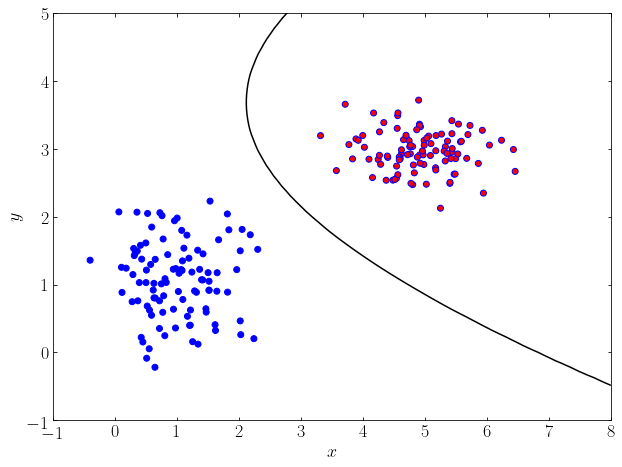

In [40]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 7.5))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=all_colors, cmap=plt.cm.binary, zorder=2)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()
